#### Fig 1d of MCS life cycle paper
- see "hist1d_BLtot_precip_nonMCSvsMCS_writeout.py"
- differentiate MCS and non-MCS, cold cloud grids (Tb < 241 K)
- 1-D buoyancy-precipitation relationship

In [1]:
import os
import sys
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from datetime import datetime
from pathlib import Path
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
from matplotlib.patches import FancyArrowPatch

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import warnings

In [2]:
warnings.filterwarnings('ignore')

### analysis - plotting

In [36]:
out_dir = Path('/scratch/wmtsai/temp_mcs/output_stats')
year_list = np.arange(2002,2007)

for n,year in enumerate(year_list):
    if n == 0:
        ds = xr.open_dataset(out_dir / 'hist1d_BL_precip_nonMCSvsMCS.{}.nc'.format(year))
    else:
        ds += ds

In [38]:
ds = ds.sel(bins_BL=ds.bins_BL[::3])

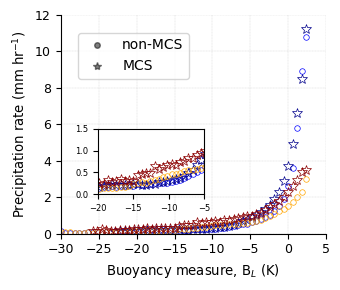

In [44]:
fig, ax = plt.subplots(1,1,figsize=(3.5,3))

ccolors = [('darkblue','b'),('darkred','orange')]

# for fake legend order
ax.plot(ds.bins_BL, np.nan*np.zeros(len(ds.bins_BL)), 'o', ms=4, color='k', alpha=0.5)
ax.plot(ds.bins_BL, np.nan*np.zeros(len(ds.bins_BL)), '*', ms=6, color='k', alpha=0.5)

for (ax,surface_type,color) in zip([ax,ax], ['ocean','land'], ccolors):

    samples_nonmcs = ds.sel(conv_type='nonMCS',surface_type=surface_type).samples
    prec_sum_nonmcs = ds.sel(conv_type='nonMCS',surface_type=surface_type).prec_gpm_sum
    cond_p_nonmcs = prec_sum_nonmcs/samples_nonmcs
    
    prob_nonmcs = samples_nonmcs/samples_nonmcs.sum('bins_BL')
    cond_p_nonmcs = cond_p_nonmcs.where(prob_nonmcs > 1e-4)
                                        
    samples_mcs = ds.sel(conv_type='MCS',surface_type=surface_type).samples
    prec_sum_mcs = ds.sel(conv_type='MCS',surface_type=surface_type).prec_gpm_sum
    cond_p_mcs = prec_sum_mcs/samples_mcs

    prob_mcs = samples_mcs/samples_mcs.sum('bins_BL')
    cond_p_mcs = cond_p_mcs.where(prob_mcs > 1e-4)
    
    ax.plot(ds.bins_BL, cond_p_nonmcs, 'o', ms=4, color=color[1], markerfacecolor='none', mew=0.5)
    ax.plot(ds.bins_BL, cond_p_mcs, '*', ms=7, color=color[0], markerfacecolor='none', mew=0.5)
    
    ax.set_ylabel('Precipitation rate (mm hr$^{-1}$)',fontsize=9.5)
    ax.set_xlabel('Buoyancy measure, B$_{L}$ (K)',fontsize=9.5)
    ax.tick_params(labelsize=9)
    ax.set_ylim([0,12])
    ax.set_xlim([-30,5])
    ax.grid(lw=0.2,ls=':',color='grey')
    
    ax.spines[['right', 'top']].set_visible(False)
    
ins = ax.inset_axes([0.14,0.18,0.4,0.3])
for (surface_type,color) in zip(['ocean','land'], ccolors):

    samples_nonmcs = ds.sel(conv_type='nonMCS',surface_type=surface_type).samples
    prec_sum_nonmcs = ds.sel(conv_type='nonMCS',surface_type=surface_type).prec_gpm_sum
    cond_p_nonmcs = prec_sum_nonmcs/samples_nonmcs
    prob_nonmcs = samples_nonmcs/samples_nonmcs.sum('bins_BL')
    cond_p_nonmcs = cond_p_nonmcs.where(prob_nonmcs > 1e-4)
    
    samples_mcs = ds.sel(conv_type='MCS',surface_type=surface_type).samples
    prec_sum_mcs = ds.sel(conv_type='MCS',surface_type=surface_type).prec_gpm_sum
    cond_p_mcs = prec_sum_mcs/samples_mcs
    prob_mcs = samples_mcs/samples_mcs.sum('bins_BL')
    cond_p_mcs = cond_p_mcs.where(prob_mcs > 1e-4)
    
    ins.plot(ds.bins_BL, cond_p_nonmcs, 'o', ms=4, color=color[1], mfc='none', mew=0.5)
    ins.plot(ds.bins_BL, cond_p_mcs, '*', ms=7, color=color[0], mfc='none', mew=0.5)
ins.set_xlim([-20,-5])
ins.set_ylim([0,1.5])
ins.tick_params(labelsize=6)

ax.legend(['non-MCS','MCS'],bbox_to_anchor=(0.01,0.45,0.5,0.5))    
#ax.set_title('Tropical MCS vs. Non-MCS',fontsize=10)
#ax.text(x=-28, y=10.7, s='(b)', fontsize=11,
#        bbox=dict(facecolor='w', alpha=0.7, edgecolor='k', pad=2.5, lw=0.5))
#ax.text(x=-11, y=10, s='Ocean', fontsize=9.5, color='b')
#ax.text(x=-10.8, y=9, s='Land', fontsize=9.5, color='r')

#ax2.set_title('Tropical Land',fontsize=10)
    
plt.tight_layout(h_pad=0.02)
fig.savefig('/scratch/wmtsai/temp_mcs/fig/buoyPrec_MCSvsNonMCS_landsea_4poster.pdf')